In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_parquet("E:\\parquet\\parsed_data\\fsc-a_ssc-a\\XFG_57-18-H18K(sa55)_B11_2441332a-ce9a-11f0-8046-f02f74d321c5_1.parquet")
df

,FSC-H,SSC-H,FSC-A,SSC-A,FITC-A,Width,Time,label,FITC_raw,FITC_log10,FITC_asinh,FITC_pct,FITC_z_robust,FSC_ratio,SSC_ratio,Area_to_Width,Time_norm,gmm_prob_infected,cluster_label
0,4955371.0,296957.0,3167571.0,160988.0,3860.0,139.0,0.000118,False,3860.0,3.586700,2.060186,0.568498,0.254543,0.639220,0.542126,22788.280575,0.000000,0.114908,0
1,4826823.0,246039.0,2971700.0,128534.0,3152.0,88.0,0.000807,False,3152.0,3.498724,1.865448,0.423062,-0.261714,0.615664,0.522413,33769.318181,0.000014,0.098731,0
2,4399692.0,202493.0,2556157.0,102161.0,15718.0,77.0,0.000988,True,15718.0,4.196425,3.448964,0.908151,3.832513,0.580985,0.504516,33196.844155,0.000018,0.993334,0
4,15987358.0,15577558.0,58736288.0,62861396.0,11817.0,394.0,0.006278,False,11817.0,4.072544,3.164472,0.880712,3.105559,3.673921,4.035382,149076.873096,0.000125,0.939473,0
6,4317480.0,288434.0,2549862.0,134271.0,4135.0,89.0,0.008822,False,4135.0,3.616581,2.126945,0.612064,0.429888,0.590590,0.465517,28650.134831,0.000177,0.126166,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,3684440.0,273475.0,2098760.0,151162.0,19901.0,90.0,49.242368,True,19901.0,4.298897,3.684548,0.927013,4.433835,0.569628,0.552745,23319.555555,0.999936,0.999250,0
39996,3916218.0,203264.0,2279482.0,87502.0,2090.0,84.0,49.243756,False,2090.0,3.320354,1.483175,0.154138,-1.308419,0.582062,0.430484,27136.690476,0.999964,0.130063,0
39997,4610752.0,267448.0,2916827.0,150340.0,8039.0,91.0,49.244212,True,8039.0,3.905256,2.781298,0.831678,2.123885,0.632614,0.562128,32053.043956,0.999974,0.589022,0
39998,5292507.0,321612.0,3315189.0,182607.0,6206.0,98.0,49.245120,False,6206.0,3.792882,2.525093,0.777301,1.464454,0.626393,0.567787,33828.459183,0.999992,0.308563,0


In [ ]:
df_label_0 = df[df["label"] == 0]
df_label_1 = df[df["label"] == 1]

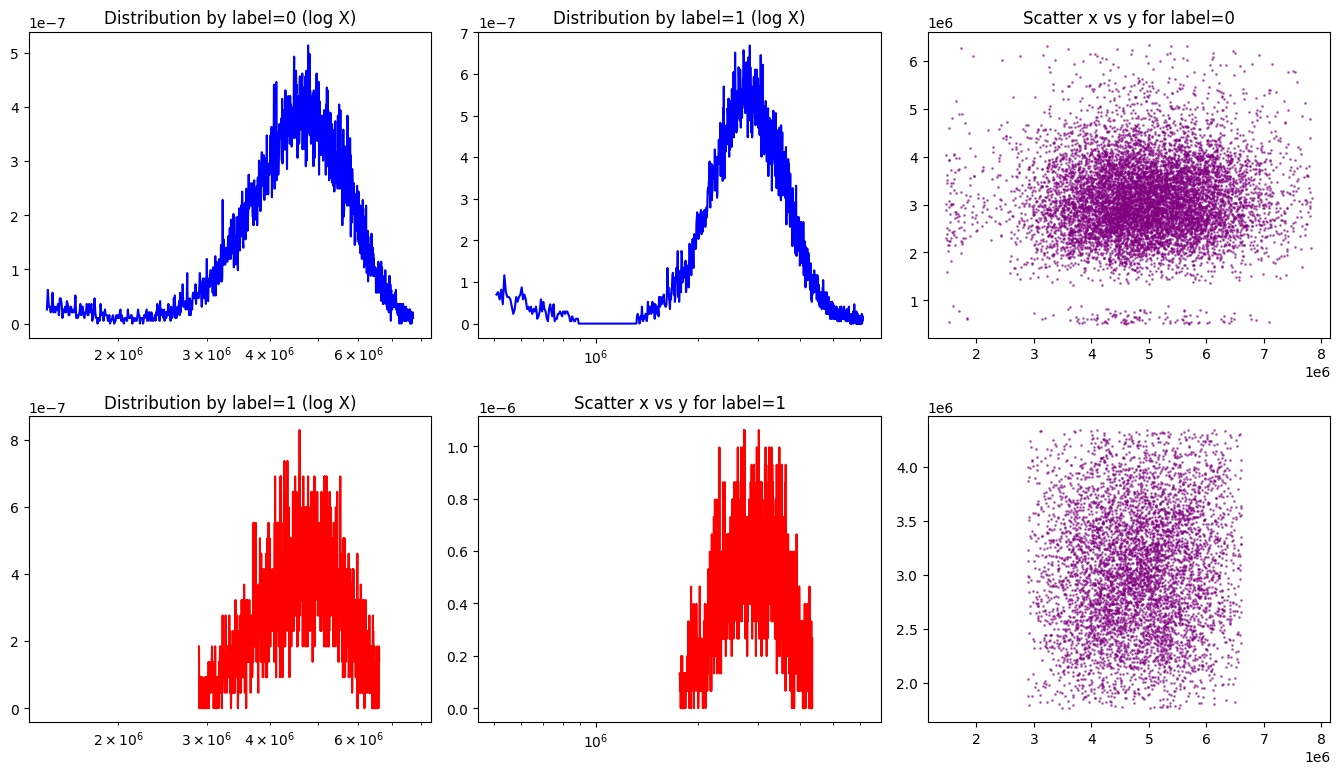

In [5]:
def clip_outliers(arr, lower_percentile=1, upper_percentile=99):
    low = np.percentile(arr, lower_percentile)
    high = np.percentile(arr, upper_percentile)
    return arr[(arr >= low) & (arr <= high)]

def plot_distributions_and_scatter(x, y, a, b, x_scatter_label_0, y_scatter_label_0, x_scatter_label_1, y_scatter_label_1, bins=1000):
    # --- считаем гистограммы ---
    p_hist, p_bins = np.histogram(x, bins=bins, density=True)
    q_hist, q_bins = np.histogram(y, bins=bins, density=True)

    # добавим маленькую константу
    p = p_hist + 1e-12
    q = q_hist + 1e-12

    # центры бинов для оси X
    p_centers = 0.5 * (p_bins[:-1] + p_bins[1:])
    q_centers = 0.5 * (q_bins[:-1] + q_bins[1:])

    a_hist, a_bins = np.histogram(a, bins=bins, density=True)
    b_hist, b_bins = np.histogram(b, bins=bins, density=True)

    # добавим маленькую константу
    a = a_hist + 1e-12
    b = b_hist + 1e-12

    # центры бинов для оси X
    a_centers = 0.5 * (a_bins[:-1] + a_bins[1:])
    b_centers = 0.5 * (b_bins[:-1] + b_bins[1:])

    # --- создаём 3 сабплота ---
    fig = plt.figure(figsize=(18, 8))
    gs = fig.add_gridspec(2, 4, width_ratios=[1, 1, 1, 1])

    ax1 = fig.add_subplot(gs[0, 0])   # верхний левый
    ax2 = fig.add_subplot(gs[1, 0], sharex=ax1)   # нижний левый
    ax3 = fig.add_subplot(gs[0, 1])   # правый (scatter)
    ax4 = fig.add_subplot(gs[1, 1], sharex=ax3)   # правый (scatter)
    ax5 = fig.add_subplot(gs[0, 2])
    ax6 = fig.add_subplot(gs[1, 2], sharex=ax5)

    # --- 1: верхняя линия ---
    ax1.plot(p_centers, p, color='blue')
    ax1.set_title("Distribution by label=0 (log X)")
    ax1.set_xscale("log")

    # --- 2: нижняя линия ---
    ax2.plot(q_centers, q, color='red')
    ax2.set_title("Distribution by label=1 (log X)")
    ax2.set_xscale("log")

    # --- 3: двойной scatter ---
    ax3.plot(a_centers, a, color='blue')
    ax3.set_title("Distribution by label=1 (log X)")
    ax3.set_xscale("log")

    ax4.plot(b_centers, b, color='red')
    ax4.set_title("Distribution by label=1 (log X)")
    ax4.set_xscale("log")

    ax5.scatter(x_scatter_label_0, y_scatter_label_0, s=1, alpha=0.5, color='purple')
    ax5.set_title("Scatter x vs y for label=0")

    ax6.scatter(x_scatter_label_1, y_scatter_label_1, s=1, alpha=0.5, color='purple')
    ax4.set_title("Scatter x vs y for label=1")

    plt.tight_layout()
    plt.show()

low_percentile=1
high_persentile=99

plot_distributions_and_scatter(
    clip_outliers(df_label_0["FSC-H"].values, low_percentile, high_persentile), 
    clip_outliers(df_label_1["FSC-H"].values, low_percentile, high_persentile), 
    clip_outliers(df_label_0["FSC-A"].values, low_percentile, high_persentile), 
    clip_outliers(df_label_1["FSC-A"].values, low_percentile, high_persentile),
    clip_outliers(df_label_0["FSC-H"].values[:10000], low_percentile, high_persentile), 
    clip_outliers(df_label_0["FSC-A"].values[:10000], low_percentile, high_persentile), 
    clip_outliers(df_label_1["FSC-H"].values[:10000], low_percentile, high_persentile), 
    clip_outliers(df_label_1["FSC-A"].values[:10000], low_percentile, high_persentile),
    )

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN, KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import RobustScaler
from scipy.stats import gaussian_kde
from scipy.ndimage import gaussian_filter, label
import matplotlib.pyplot as plt

def select_central_cluster_by_centroid(clusters, XYs):
    """Выбрать кластер, чей центроид ближе всего к медиане всего набора (т.е. 'центральный')."""
    unique = np.unique(clusters)
    unique = unique[unique != -1]  # -1 = шум для DBSCAN
    if len(unique) == 0:
        return None
    global_med = np.median(XYs, axis=0)
    best = None
    best_dist = np.inf
    for u in unique:
        mask = clusters == u
        centroid = XYs[mask].mean(axis=0)
        d = np.linalg.norm(centroid - global_med)
        if d < best_dist:
            best_dist = d
            best = u
    return best

def filter_by_dbscan(x, y, eps=0.05, min_samples=50, **pre_kwargs):
    XYs, x_trim, y_trim, scaler = preprocess_xy(x, y, **pre_kwargs)
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(XYs)
    labels = db.labels_
    chosen = select_central_cluster_by_centroid(labels, XYs)
    mask = (labels == chosen)
    return mask, XYs, x_trim, y_trim, labels, db

def filter_by_gmm(x, y, n_components=3, **pre_kwargs):
    XYs, x_trim, y_trim, scaler = preprocess_xy(x, y, **pre_kwargs)
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
    gmm.fit(XYs)
    labels = gmm.predict(XYs)
    chosen = select_central_cluster_by_centroid(labels, XYs)
    mask = (labels == chosen)
    return mask, XYs, x_trim, y_trim, labels

def filter_by_kde_threshold(x, y, grid_size=200, bandwidth=None, frac_keep=0.5, **pre_kwargs):
    """
    2D KDE + thresholding: выбираем клетки с плотностью выше порога (например, верхние frac_keep).
    Затем берем компонент, который ближе к центру.
    """
    XYs, x_trim, y_trim, scaler = preprocess_xy(x, y, **pre_kwargs)
    # KDE in original (trimmed & log) space:
    kde = gaussian_kde(np.vstack([XYs[:,0], XYs[:,1]]), bw_method=bandwidth)
    # grid
    xmin, ymin = XYs.min(axis=0)
    xmax, ymax = XYs.max(axis=0)
    xi = np.linspace(xmin, xmax, grid_size)
    yi = np.linspace(ymin, ymax, grid_size)
    xx, yy = np.meshgrid(xi, yi)
    grid_coords = np.vstack([xx.ravel(), yy.ravel()])
    zz = kde(grid_coords).reshape(grid_size, grid_size)
    # smooth and threshold
    zzs = gaussian_filter(zz, sigma=1.0)
    thresh = np.percentile(zzs.ravel(), 100*(1-frac_keep))
    mask_cells = zzs >= thresh
    # label connected regions
    labeled, ncomp = label(mask_cells)
    if ncomp == 0:
        return np.ones(len(XYs), dtype=bool), XYs, x_trim, y_trim, None
    # map each point to cell index to get component id
    ix = np.searchsorted(xi, XYs[:,0]) - 1
    iy = np.searchsorted(yi, XYs[:,1]) - 1
    # clip indices
    ix = np.clip(ix, 0, grid_size-1)
    iy = np.clip(iy, 0, grid_size-1)
    comp_ids = labeled[iy, ix]
    # choose component whose centroid is closest to global median
    unique = np.unique(comp_ids)
    unique = unique[unique != 0]  # 0 = background
    global_med = np.median(XYs, axis=0)
    best = None
    best_dist = np.inf
    for u in unique:
        pts = XYs[comp_ids == u]
        if len(pts) == 0:
            continue
        centroid = pts.mean(axis=0)
        d = np.linalg.norm(centroid - global_med)
        if d < best_dist:
            best_dist = d
            best = u
    mask = comp_ids == best
    return mask, XYs, x_trim, y_trim, comp_ids

from sklearn.preprocessing import RobustScaler

def preprocess_xy(x, y, log=True, eps=1e-9, lower_p=1, upper_p=99):
    """Приведение данных: отсечь экстремальные процентили и (опционально) логарифмировать безопасно."""

    # убираем NaN в исходных данных
    mask = (~np.isnan(x)) & (~np.isnan(y))
    x0 = x[mask]
    y0 = y[mask]

    # отрезаем экстремальные процентили
    lo_x, hi_x = np.percentile(x0, [lower_p, upper_p])
    lo_y, hi_y = np.percentile(y0, [lower_p, upper_p])
    mask2 = (x0 >= lo_x) & (x0 <= hi_x) & (y0 >= lo_y) & (y0 <= hi_y)
    x1 = x0[mask2]
    y1 = y0[mask2]

    if log:
        # безопасный логарифм: отрицательные значения или нули превращаем в NaN
        def safe_log10(arr):
            arr_safe = arr + eps
            arr_safe[arr_safe <= 0] = np.nan
            return np.log10(arr_safe)

        x1 = safe_log10(x1)
        y1 = safe_log10(y1)

    # после логарифмирования могут появиться NaN: убираем их
    mask_finite = np.isfinite(x1) & np.isfinite(y1)
    x1 = x1[mask_finite]
    y1 = y1[mask_finite]

    # масштабируем робастно (median + IQR)
    XY = np.vstack([x1, y1]).T
    scaler = RobustScaler()
    XYs = scaler.fit_transform(XY)

    return XYs, x1, y1, scaler

# ------------------------
# Пример использования и визуализация
# ------------------------
def visualize_filter_linear(x, y, mask, XYs=None, title="filtered"):
    plt.figure(figsize=(10,4))
    
    plt.subplot(1,2,1)
    plt.scatter(XYs[:,0], XYs[:,1], s=1, alpha=0.2, label='all')
    plt.scatter(XYs[mask,0], XYs[mask,1], s=2, alpha=0.8, label='selected')
    plt.legend()
    plt.title(title + " (linear)")
    
    # задаём границы по перцентилям
    low_p, high_p = 1, 99
    plt.xlim(np.percentile(XYs[:,0], [low_p, high_p]))
    plt.ylim(np.percentile(XYs[:,1], [low_p, high_p]))
    
    plt.subplot(1,2,2)
    plt.hist(XYs[:,0], bins=100, alpha=0.3, density=True, label='all x')
    plt.hist(XYs[mask,0], bins=100, alpha=0.5, density=True, label='sel x')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


=== Start DBSCAN filtering ===
[181729. 201535. 214060. ... 222457. 191610. 283558.]
[1019917.   1185796.   1281300.   ... 1267117.5  1088773.88 1962360.75]
DBSCAN filtering done in 0.46 seconds
=== Start visualization ===


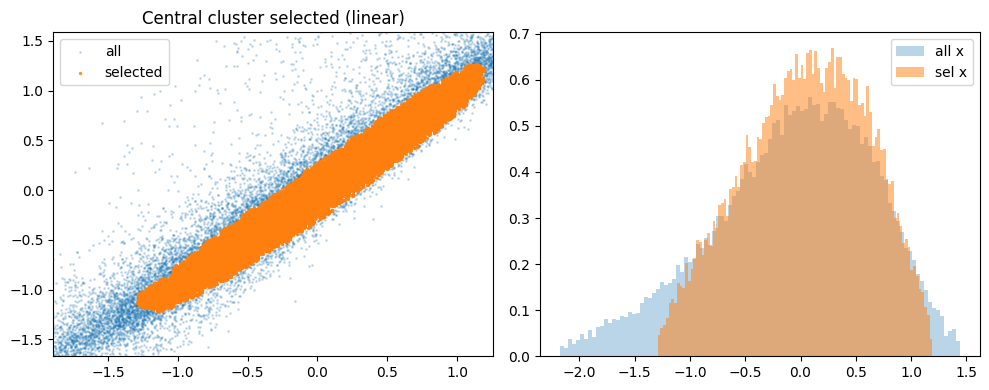

Visualization done in 0.71 seconds
Total time: 1.17 seconds


In [70]:
import time

x = df["FSC-H"].values
y = df["FSC-A"].values

start_total = time.time()
print("=== Start DBSCAN filtering ===")
start_dbscan = time.time()
mask, XYs, x_trim, y_trim, labels, db = filter_by_dbscan(
    x, y,
    eps=0.05,        # чувствительность к плотности
    min_samples=100,  # минимальный размер кластера
    log=True,        # логарифмирование осей
    lower_p=1,       # отсечение 1%-го перцентиля
    upper_p=99       # отсечение 99%-го перцентиля
)
end_dbscan = time.time()
print(f"DBSCAN filtering done in {end_dbscan - start_dbscan:.2f} seconds")

print("=== Start visualization ===")
start_viz = time.time()
visualize_filter_linear(x, y, mask, XYs=XYs, title="Central cluster selected")
end_viz = time.time()
print(f"Visualization done in {end_viz - start_viz:.2f} seconds")

end_total = time.time()
print(f"Total time: {end_total - start_total:.2f} seconds")

In [27]:
from fsca_fsch_model_selector import *

In [57]:
df_new = pd.read_parquet("E:\\parquet\\parsed_data\\fsc-h_fsc-a\\EG.5_58-18-57-Fc_6_9ae93a61-ce99-11f0-83a4-f02f74d321c5_1_2.parquet")

selector = FlowDBSCANSelector(eps=0.1, min_samples=100, log=True, lower_p=1, upper_p=99)
selector.fit(df["FSC-H"].values, df["FSC-A"].values, sample_size=200_000, random_state=42)

# сохранить модель
# selector.save("models/fsc-h_fsc-a_dbscan_sel_01.joblib")

# загрузить модель
# selector = FlowDBSCANSelector.load("models/fsc-h_fsc-a_dbscan_sel_01.joblib")

# предсказание на новом DataFrame
labels = selector.predict_df(df_new, "FSC-H", "FSC-A")
labels

Train: preprocess+fit DBSCAN: 0.59s, tree build: 0.02s, cores: 33814


,FSC-H,SSC-H,FITC-H,FSC-A,SSC-A,FITC-A,label,FITC_raw,FITC_log10,FITC_asinh,FITC_pct,FITC_z_robust,FSC_ratio,SSC_ratio,gmm_prob_infected,cluster_label,dbscan_label
0,225659.0,187300.0,641.0,1424735.13,1283156.50,4356.31,False,4356.31,3.639218,2.177693,0.74286,0.949420,6.313664,6.850809,0.933426,0,-1
4,162658.0,163898.0,783.0,880712.38,894782.63,4398.16,False,4398.16,3.643370,2.187014,0.74856,0.980114,5.414504,5.459387,0.932279,0,-1
5,176856.0,136911.0,615.0,1012974.63,771537.75,3690.50,False,3690.50,3.567203,2.016779,0.61742,0.416934,5.727680,5.635323,0.944312,0,-1
6,166378.0,156626.0,1008.0,937279.88,902023.50,5336.13,False,5336.13,3.727308,2.376314,0.83784,1.600755,5.633436,5.759092,0.888912,0,-1
7,147897.0,86436.0,454.0,843868.25,521683.22,2820.44,False,2820.44,3.450471,1.760081,0.37559,-0.446187,5.705783,6.035485,0.932518,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,115838.0,127957.0,571.0,654591.38,704223.31,3466.09,False,3466.09,3.539965,1.956363,0.56193,0.215537,5.650921,5.503593,0.944783,0,-1
49993,163779.0,101514.0,465.0,951264.63,606972.00,2893.06,False,2893.06,3.461508,1.784075,0.39788,-0.364581,5.808221,5.979195,0.935387,0,-1
49995,155060.0,132539.0,501.0,923652.75,775977.88,3032.97,False,3032.97,3.482011,1.828821,0.43970,-0.212976,5.956744,5.854714,0.939567,0,-1
49996,151420.0,146681.0,1255.0,960618.13,884970.19,7215.56,False,7215.56,3.858330,2.674155,0.90610,2.569540,6.344064,6.033298,0.640414,0,-1


In [62]:
labels[labels['dbscan_label']==2]

,FSC-H,SSC-H,FITC-H,FSC-A,SSC-A,FITC-A,label,FITC_raw,FITC_log10,FITC_asinh,FITC_pct,FITC_z_robust,FSC_ratio,SSC_ratio,gmm_prob_infected,cluster_label,dbscan_label
581,114302.0,94022.0,398.0,568441.06,466132.63,2190.56,False,2190.56,3.340753,1.525747,0.21248,-1.257442,4.973151,4.957697,0.864752,0,2
703,106478.0,84910.0,409.0,568942.25,469482.97,2471.53,False,2471.53,3.393142,1.636605,0.27638,-0.870082,5.343285,5.529183,0.908316,0,2
2219,121244.0,107123.0,499.0,567678.00,556574.50,2703.44,False,2703.44,3.432077,1.720246,0.34168,-0.582189,4.682112,5.195658,0.926623,0,2
2560,98544.0,71805.0,317.0,567691.50,439203.19,1937.00,False,1937.00,3.287354,1.415101,0.17608,-1.652280,5.760792,6.116610,0.782019,0,2
2739,117640.0,88296.0,440.0,563677.25,480181.44,2688.53,False,2688.53,3.429676,1.715061,0.33699,-0.599942,4.791544,5.438315,0.925739,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49342,93003.0,79112.0,373.0,554904.81,441021.38,2103.06,False,2103.06,3.323058,1.488798,0.19748,-1.388281,5.966526,5.574646,0.842712,0,2
49373,94080.0,75337.0,519.0,561619.13,446045.19,3509.03,False,3509.03,3.545311,1.968198,0.57334,0.255063,5.969591,5.920666,0.944833,0,2
49379,86738.0,72403.0,356.0,550319.38,437517.69,1925.28,False,1925.28,3.284719,1.409711,0.17467,-1.671759,6.344617,6.042812,0.776524,0,2
49635,100243.0,72989.0,367.0,561031.25,419814.28,1905.34,False,1905.34,3.280200,1.400483,0.17254,-1.705173,5.596712,5.751747,0.766737,0,2


df1: Оставлено 36466/37375 точек (97.6%) после фильтрации квартилей 0.007-0.99
df2: Оставлено 36466/37375 точек (97.6%) после фильтрации квартилей 0.007-0.99


C:\Users\Professional\AppData\Local\Temp\ipykernel_41444\2137760199.py:73: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap_name, n_colors)


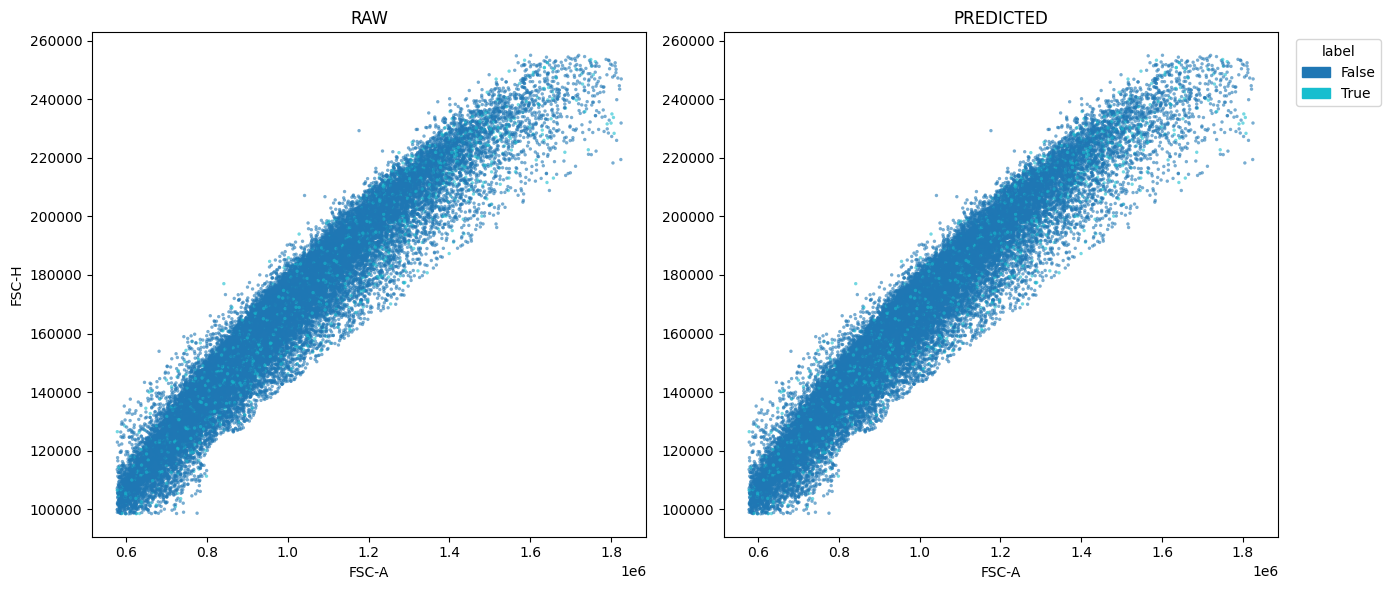

In [ ]:
from matplotlib.patches import Patch

def plot_two_scatter_by_label(df1, df2, x_col, y_col, label_col='label',
                              figsize=(12,6), cmap_name='tab10',
                              s=10, alpha=0.7, titles=None, sharexy=False,
                              filter_quantiles=False, quantile_range=(0.01, 0.99),
                              common_axes=True):
    """
    Построить 2 scatter-плота (side-by-side) для df1 и df2.
    Точки раскрашиваются по колонке label_col (одинаковая схема цветов для обоих).
    
    Параметры:
      df1, df2        - pandas.DataFrame
      x_col, y_col    - имена колонок с координатами
      label_col       - имя колонки с метками (по ней окрашиваем)
      figsize         - размер фигуры (width, height)
      cmap_name       - имя colormap (matplotlib) (напр. 'tab10', 'tab20')
      s               - размер маркера
      alpha           - прозрачность маркера
      titles          - None или tuple (title_left, title_right)
      sharexy         - если True — sharex и sharey между осями
      filter_quantiles - если True, фильтрует значения по квартилям quantile_range
      quantile_range  - кортеж (нижний_квантиль, верхний_квантиль) для фильтрации
      common_axes     - если True, устанавливает одинаковые пределы осей X и Y для обоих графиков
    Возвращает:
      fig, axes (axes — массив из двух Axes)
    """
    # проверки
    for df, name in ((df1, "df1"), (df2, "df2")):
        if not isinstance(df, pd.DataFrame):
            raise TypeError(f"{name} должен быть pandas.DataFrame")
        for col in (x_col, y_col, label_col):
            if col not in df.columns:
                raise ValueError(f"Колонка '{col}' не найдена в {name}")

    # Фильтрация по квартилям, если включена
    if filter_quantiles:
        df1_filtered = df1.copy()
        df2_1 = df2.copy()
        
        # Вычисляем квартили для каждого датафрейма отдельно
        for df_1, df_name in [(df1_1, "df1"), (df2_1, "df2")]:
            # Вычисляем квартили для x_col и y_col
            x_lower = df_1[x_col].quantile(quantile_range[0])
            x_upper = df_filtered[x_col].quantile(quantile_range[1])
            y_lower = df_filtered[y_col].quantile(quantile_range[0])
            y_upper = df_filtered[y_col].quantile(quantile_range[1])
            
            # Фильтруем значения в пределах квартилей
            mask = (df_filtered[x_col] >= x_lower) & (df_filtered[x_col] <= x_upper) & \
                   (df_filtered[y_col] >= y_lower) & (df_filtered[y_col] <= y_upper)
            
            # Создаем отфильтрованную копию
            if df_name == "df1":
                df1 = df_filtered[mask].copy()
            else:
                df2 = df_filtered[mask].copy()
            
            print(f"{df_name}: Оставлено {mask.sum()}/{len(mask)} точек "
                  f"({mask.sum()/len(mask)*100:.1f}%) после фильтрации квартилей "
                  f"{quantile_range[0]}-{quantile_range[1]}")

    # Собираем уникальные метки в порядке появления (с обоих датафреймов)
    seen = []
    for val in pd.concat([df1[label_col], df2[label_col]], ignore_index=True).dropna().tolist():
        if val not in seen:
            seen.append(val)
    if len(seen) == 0:
        # если нет меток — оставим одну категорию None
        seen = [None]

    n_colors = max(len(seen), 1)
    cmap = plt.cm.get_cmap(cmap_name, n_colors)
    label_to_color = {lab: cmap(i % n_colors) for i, lab in enumerate(seen)}

    # helper для одного датафрейма
    def _prepare_plot_data(df):
        mask = df[x_col].notnull() & df[y_col].notnull() & df[label_col].notnull()
        x = df.loc[mask, x_col].to_numpy()
        y = df.loc[mask, y_col].to_numpy()
        labels = df.loc[mask, label_col].tolist()
        colors = [label_to_color.get(l, (0.5,0.5,0.5,1.0)) for l in labels]
        return x, y, labels, colors

    # Вычисляем общие пределы для осей
    def _get_common_limits(data1, data2):
        """Вычисляет общие пределы для двух наборов данных"""
        all_data = np.concatenate([data1, data2])
        if len(all_data) == 0:
            return 0, 1  # возвращаем значения по умолчанию если нет данных
        min_val = np.min(all_data)
        max_val = np.max(all_data)
        
        # Добавляем небольшие отступы (5% от диапазона)
        padding = (max_val - min_val) * 0.05
        if padding == 0:  # если все значения одинаковые
            padding = 0.01 * abs(min_val) if min_val != 0 else 0.5
        
        return min_val - padding, max_val + padding

    # создаём фигуру и оси
    if sharexy:
        fig, axes = plt.subplots(1, 2, figsize=figsize, sharex=True, sharey=True)
    else:
        fig, axes = plt.subplots(1, 2, figsize=figsize)

    # Подготавливаем данные для обоих графиков
    x1, y1, labs1, cols1 = _prepare_plot_data(df1)
    x2, y2, labs2, cols2 = _prepare_plot_data(df2)

    # левый
    axes[0].scatter(x1, y1, c=cols1, s=s, alpha=alpha, marker='o', edgecolors='none')
    axes[0].set_xlabel(x_col)
    axes[0].set_ylabel(y_col)
    if titles and len(titles) >= 1:
        axes[0].set_title(titles[0])
    else:
        axes[0].set_title("Dataset 1")

    # правый
    axes[1].scatter(x2, y2, c=cols2, s=s, alpha=alpha, marker='o', edgecolors='none')
    axes[1].set_xlabel(x_col)
    if titles and len(titles) >= 2:
        axes[1].set_title(titles[1])
    else:
        axes[1].set_title("Dataset 2")

    # Устанавливаем одинаковые пределы осей для обоих графиков
    if common_axes:
        # Вычисляем общие пределы по X и Y
        x_min, x_max = _get_common_limits(x1, x2)
        y_min, y_max = _get_common_limits(y1, y2)
        
        # Устанавливаем одинаковые пределы на обоих осях
        axes[0].set_xlim(x_min, x_max)
        axes[0].set_ylim(y_min, y_max)
        axes[1].set_xlim(x_min, x_max)
        axes[1].set_ylim(y_min, y_max)

    # легенда (единая) — делаем по всем встречающимся меткам
    legend_handles = [Patch(color=label_to_color[lab], label=str(lab)) for lab in seen]
    axes[1].legend(handles=legend_handles, title=label_col, bbox_to_anchor=(1.02, 1), loc="upper left")

    plt.tight_layout()
    return fig, axes

# Пример использования с общими осями
fig, axes = plot_two_scatter_by_label(
    df_new, 
    labels, 
    x_col='FSC-A', 
    y_col='FSC-H',
    label_col='label',
    titles=("RAW", "PREDICTED"),
    figsize=(14,6),
    cmap_name='tab10', 
    s=6, 
    alpha=0.6,
    sharexy=False,
    filter_quantiles=True,
    quantile_range=(0.007, 0.99),
    common_axes=True  # Включаем одинаковые оси для обоих графиков
)
plt.show()

In [80]:
df = pd.read_parquet("E:\\parquet\\parsed_data\\fsc-a_ssc-a\\EG.5_58-10-57_4_08abcc31-ce9a-11f0-b2e5-f02f74d321c5_1.parquet")

df_new = pd.read_parquet("E:\\parquet\\parsed_data\\fsc-a_ssc-a\\JN.1_7-35-57_7_a772f627-ce99-11f0-90bd-f02f74d321c5_1.parquet")

selector = FlowDBSCANSelector(eps=0.07, min_samples=100, log=True, lower_p=1, upper_p=99)
selector.fit(df["FSC-H"].values, df["FSC-A"].values, sample_size=200_000, random_state=42)

# сохранить модель
selector.save("models/fsc-h_fsc-a_dbscan_sel_02.joblib")

# загрузить модель
sel2 = FlowDBSCANSelector.load("models/fsc-h_fsc-a_dbscan_sel_02.joblib")

# предсказание на новом DataFrame
labels = sel2.predict(df_new["FSC-H"].values, df_new["FSC-A"].values)
print("Selected fraction:", (labels != -1).mean())

Train: preprocess+fit DBSCAN: 0.51s, tree build: 0.02s, cores: 33395
Selected fraction: 0.8894914858875671


In [81]:
sel2 = FlowDBSCANSelector.load("models/fsc-h_fsc-a_dbscan_sel_02.joblib")

# предсказание на новом DataFrame
labels = sel2.predict(df_new["FSC-A"].values, df_new["FSC-H"].values)
print("Selected fraction:", (labels != -1).mean())

# пакетная обработка файлов (визуализация + summary CSV)
files = [
    "E:\\parquet\\parsed_data\\fsc-a_ssc-a\\JN.1_7-35-57_7_a772f627-ce99-11f0-90bd-f02f74d321c5_1.parquet", 
    "E:\\parquet\\parsed_data\\fsc-a_ssc-a\\KP.3.1.1_58-18-57-Fc_D9_bb677317-ce99-11f0-9b2d-f02f74d321c5_1.parquet", 
    "E:\\parquet\\parsed_data\\fsc-a_ssc-a\\EG.5_58-10-57_4_08abcc31-ce9a-11f0-b2e5-f02f74d321c5_1.parquet",
    "E:\\parquet\\parsed_data\\fsc-a_ssc-a\\KP.2_58-N-57_9_108af62e-ce9a-11f0-822d-f02f74d321c5_1.parquet",
    "E:\\parquet\\parsed_data\\fsc-a_ssc-a\\XFG_57-18-H18K(sa55)_B4_24d3a807-ce9a-11f0-81c2-f02f74d321c5_1.parquet",
    "E:\\parquet\\parsed_data\\fsc-a_ssc-a\\XFG_XFG_SA55_A10_41e5b654-ce9a-11f0-bfa6-f02f74d321c5_1.parquet",
    "E:\\parquet\\parsed_data\\fsc-a_ssc-a\\NB.1.8.1_58-35-H15K_A8_df8a8c82-ce99-11f0-8b9a-f02f74d321c5_1.parquet",
    "E:\\parquet\\parsed_data\\fsc-a_ssc-a\\EG.5_58-18-57-Fc_11_a3adbddc-ce99-11f0-9658-f02f74d321c5_1.parquet",
    ]
summary = sel2.process_and_visualize_files(files, x_col="FSC-H", y_col="FSC-A", out_dir="results_vis_2")
print(summary)

Selected fraction: 0.0

--- Processing file: E:\parquet\parsed_data\fsc-a_ssc-a\JN.1_7-35-57_7_a772f627-ce99-11f0-90bd-f02f74d321c5_1.parquet ---
Read parquet: 17,148 rows
Predict time: 0.02s, plotting & saving: 0.95s, total: 0.97s

--- Processing file: E:\parquet\parsed_data\fsc-a_ssc-a\KP.3.1.1_58-18-57-Fc_D9_bb677317-ce99-11f0-9b2d-f02f74d321c5_1.parquet ---
Read parquet: 36,724 rows
Predict time: 0.06s, plotting & saving: 0.60s, total: 0.66s

--- Processing file: E:\parquet\parsed_data\fsc-a_ssc-a\EG.5_58-10-57_4_08abcc31-ce9a-11f0-b2e5-f02f74d321c5_1.parquet ---
Read parquet: 40,074 rows
Predict time: 0.05s, plotting & saving: 0.62s, total: 0.67s

--- Processing file: E:\parquet\parsed_data\fsc-a_ssc-a\KP.2_58-N-57_9_108af62e-ce9a-11f0-822d-f02f74d321c5_1.parquet ---
Read parquet: 19,448 rows
Predict time: 0.03s, plotting & saving: 0.62s, total: 0.64s

--- Processing file: E:\parquet\parsed_data\fsc-a_ssc-a\XFG_57-18-H18K(sa55)_B4_24d3a807-ce9a-11f0-81c2-f02f74d321c5_1.parquet ---

In [23]:
manager = DBSCANModelManager()
manager.add_model("m1", FlowDBSCANSelector.load("models/fsc-h_fsc-a_dbscan_sel_01.joblib"))
manager.add_model("m2", FlowDBSCANSelector.load("models/fsc-h_fsc-a_dbscan_sel_02.joblib"))
# manager.add_model("m3", FlowDBSCANSelector.load("models/fsc-a_ssc-a_dbscan_sel_03.joblib"))

folder = Path("E:\\parquet\\parsed_data\\fsc-a_ssc-a")
files = list(folder.glob("*.parquet"))

summary = manager.predict_files_with_fallback(
    file_paths=files,
    model_names=["m1","m2"],
    x_col="FSC-H",
    y_col="FSC-A",
    out_dir="E:\\parquet\\parsed_data\\fsc-h_fsc-a",
    min_rows=10_000,
    min_frac=0.6,
)

Processing files:   0%|          | 0/1401 [00:00<?, ?file/s]

Processing files: 100%|██████████| 1401/1401 [02:16<00:00, 10.23file/s]


Summary saved to E:\parquet\parsed_data\fsc-h_fsc-a\summary.csv
